**Setup Python 3.8 on Colab Environment.**

In [1]:
!sudo apt-get update -y
!sudo apt-get install python3.8
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 2
!python --version
!sudo apt-get install python3-pip
!python -m pip install --upgrade pip
!pip install ipykernel

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [76.8 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [931 kB]
Get:13 htt

**Installing OpeNTF**

In [2]:
%rm -R opentf/
!git clone https://github.com/fani-lab/opentf
%cd opentf/
!pip install -r requirements.txt
%cd src/

rm: cannot remove 'opentf/': No such file or directory
Cloning into 'opentf'...
remote: Enumerating objects: 3145, done.
remote: Counting objects: 100% (3145/3145), done.
remote: Compressing objects: 100% (2226/2226), done.
remote: Total 3145 (delta 1373), reused 2473 (delta 876), pack-reused 0
Receiving objects: 100% (3145/3145), 34.58 MiB | 15.75 MiB/s, done.
Resolving deltas: 100% (1373/1373), done.
/content/opentf
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 881.9/881.9 MB 118.7 MB/s eta 0:00:01tcmalloc: large alloc 1102422016 bytes == 0x374e2000 @  0x7f3eb8210615 0x4f69ad 0x5aa051 0x5a9f83 0x5d290c 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x4fa54a 0x556ea9 0x555bc0 0x4fa5dd 0x557802 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 47.5 MB/s eta 0:0

/content/opentf/src


**Default Hyperparameters**

In [3]:
!cat param.py

import random
import torch
import numpy as np

random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

np.random.seed(0)

settings = {
    'model':{
        'baseline': {
            'random': {
                'b': 4096
            },
            'fnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': None,  # number of negative samples
                'ns': None,  # 'uniform', 'unigram', 'unigram_b'
            },
            'bnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': None,  # number of negative samples
                'ns': None,  # 'uniform', 'unigram', 'unigram_b'
                's': 1  # # sample_elbo for bnn
            },
           

**Chane a Hyperparameter, e.g., Negative Sampling Heuristics**
```
settings['model']['baseline']['fnn']['ns'] = 'uniform'
settings['model']['baseline']['fnn']['nns'] = 1
settings['model']['baseline']['bnn']['ns'] = 'unigram_b'
settings['model']['baseline']['bnn']['nns'] = 2
```



In [5]:
%%writefile param.py 
import random
import torch
import numpy as np

random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

np.random.seed(0)

settings = {
    'model':{
        'baseline': {
            'random': {
                'b': 4096
            },
            'fnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': 1,  # number of negative samples
                'ns': 'uniform',  # 'uniform', 'unigram', 'unigram_b'
            },
            'bnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': 2,  # number of negative samples
                'ns': 'unigram_b',  # 'uniform', 'unigram', 'unigram_b'
                's': 1  # # sample_elbo for bnn
            },
            'emb':{
                'd': 100,# embedding dimension
                'e': 100,# epoch
                'dm': 1,# training algorithm. 1: distributed memory (PV-DM), 0: distributed bag of words (PV-DBOW)
                'w': 1 #cooccurrence window
            }
        },
        'cmd': ['train', 'test', 'eval', 'plot'],  # 'train', 'test', 'eval'
        'nfolds': 3,
        'train_test_split': 0.85
    },
    'data':{
        'domain': {
            'dblp':{},
            'uspt':{},
            'imdb':{},
        },
        'filter': {
            'min_nteam': 75,
            'min_team_size': 3,
        },
        'parallel': 1,
        'ncore': 0,# <= 0 for all
        'bucket_size': 500
    },
}

Overwriting param.py


**Clearing Cache Pickles for Teams Sparce Matrix if Exist`(Optional)`**

In [6]:
!rm -R ../data/preprocessed/dblp/toy.dblp.v12.json/

**Benchmark on Toy subset of DBLP for non-Bayesian Feedforward (fnn) and Bayesian (bnn) Models**

In [7]:
!python main.py -data ../data/raw/dblp/toy.dblp.v12.json -domain dblp -model fnn bnn

Loading sparse matrices from ./../data/preprocessed/dblp/toy.dblp.v12.json/teamsvecs.pkl ...
File not found! Generating the sparse matrices ...
Loading indexes pickle from ./../data/preprocessed/dblp/toy.dblp.v12.json/indexes.pkl ...
Pickles not found! Reading raw data from ../data/raw/dblp/toy.dblp.v12.json (progress in bytes) ...
  0% 0/46630 [00:00<?, ?it/s]JSONDecodeError: There has been error in loading json line `[
`!
Expecting value: line 2 column 1 (char 2)
JSONDecodeError: There has been error in loading json line `]`!
Expecting value: line 1 column 1 (char 0)
100% 46606/46630 [00:00<00:00, 14041066.82it/s]
It took 0.0004496574401855469 seconds to pickle the data into ./../data/preprocessed/dblp/toy.dblp.v12.json
It took 0.027997732162475586 seconds to generate and store the sparse matrices of size (31, 25) at ./../data/preprocessed/dblp/toy.dblp.v12.json/teamsvecs.pkl
Fold 0/2, Epoch 0/19, Minibatch 0/0, Phase train, Running Loss train 38.868099212646484, Time 0.0068886280059

**Benchmark Output Folder on toy.dblp for Baselines**

In [8]:
!ls ../output/toy.dblp.v12.json/

bnn  bnn_emb  fnn  fnn_emb  random


**Let's look at the Bayesian (bnn) Results**

```
#team:30, #skills:11, #members:12
layers:[100], learning rate:0.1, batch size:4096, epoch:20, 
#negative samples:2, negative sampling: unigram_b, elbo samples:1
```

In [9]:
!ls ../output/toy.dblp.v12.json/bnn/t31.s11.m13.l[100].lr0.1.b4096.e20.nns2.nsunigram_b.s1

f0.test.pred		    state_dict_model.f1.e15.pt
f0.test.pred.eval.mean.csv  state_dict_model.f1.e16.pt
f0.test.pred.eval.roc.pkl   state_dict_model.f1.e17.pt
f0.train_valid_loss.png     state_dict_model.f1.e18.pt
f1.test.pred		    state_dict_model.f1.e19.pt
f1.test.pred.eval.mean.csv  state_dict_model.f1.e1.pt
f1.test.pred.eval.roc.pkl   state_dict_model.f1.e2.pt
f1.train_valid_loss.png     state_dict_model.f1.e3.pt
f2.test.pred		    state_dict_model.f1.e4.pt
f2.test.pred.eval.mean.csv  state_dict_model.f1.e5.pt
f2.test.pred.eval.roc.pkl   state_dict_model.f1.e6.pt
f2.train_valid_loss.png     state_dict_model.f1.e7.pt
state_dict_model.f0.e0.pt   state_dict_model.f1.e8.pt
state_dict_model.f0.e10.pt  state_dict_model.f1.e9.pt
state_dict_model.f0.e11.pt  state_dict_model_f1.pt
state_dict_model.f0.e12.pt  state_dict_model.f2.e0.pt
state_dict_model.f0.e13.pt  state_dict_model.f2.e10.pt
state_dict_model.f0.e14.pt  state_dict_model.f2.e11.pt
state_dict_model.f0.e15.pt  state_dict_model.f2.e12.pt

**ROC Plot for 3-Fold Cross-Validated Models on Test Set**

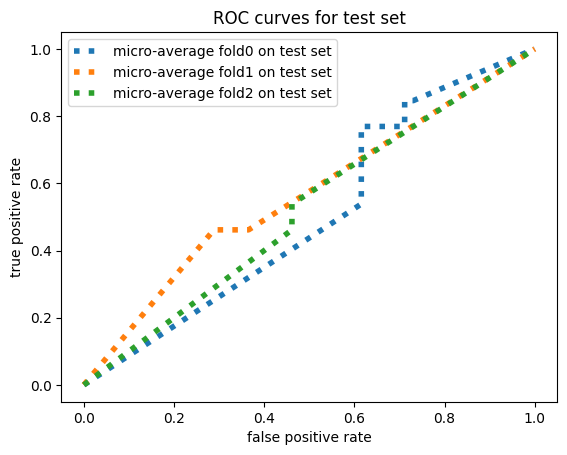

In [10]:
from IPython.display import Image
Image('../output/toy.dblp.v12.json/bnn/t31.s11.m13.l[100].lr0.1.b4096.e20.nns2.nsunigram_b.s1/test.roc.png')

In [11]:
import pandas as pd
pd.read_csv('../output/toy.dblp.v12.json/bnn/t31.s11.m13.l[100].lr0.1.b4096.e20.nns2.nsunigram_b.s1/test.pred.eval.mean.csv', index_col = 0)

,mean
P_2,0.066667
P_5,0.200000
P_10,0.226667
recall_2,0.055556
recall_5,0.383333
recall_10,0.866667
ndcg_cut_2,0.051580
ndcg_cut_5,0.238343
ndcg_cut_10,0.437073
map_cut_2,0.027778
